<a href="https://colab.research.google.com/github/molcretb/smFRET_corr_analysis/blob/main/pipeline_Dhar_Berg_smFRET_correlation_framework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python implementation of the workflow developed by M. Dhar and M. A. Berg, 2025 (10.1063/5.0284658)

*by Bastien Molcrette (2025)*

*License: MIT*

# Presentation of the project

Python implementation of the multichannel correlation analysis framework described by M. Dhar and M. A. Berg [J. Chem. Phys. 163, 184113 (2025)] (DOI: [10.1063/5.0284658](https://doi.org/10.1063/5.0284658)) for smFRET application

Supplementary information can be found from FigShare (contained guidelines for the pratical implementation of Dhar & Berg framework): https://doi.org/10.60893/figshare.jcp.30406921

See related GitHub: https://github.com/molcretb/smFRET_corr_analysis

Please provide feedback and report issues using the associated GitHub repository or by email at bastien.molcrette@unibas.ch

Thanks!

# Data and scripts import

Before running the following pipeline, make sure to import all the 19 txt files with FRET traces from file exp_dataset_Fig2_1ms.zip (in Zenodo [10.1063/5.0284658](https://doi.org/10.1063/5.0284658)) into Google Colab (use the panel on the left); please also import the scripts correlation_module.py and inversion_module.py from this GitHub repository [smFRET_corr_analysis](https://github.com/molcretb/smFRET_corr_analysis) into Google Colab as well.

# Analysis pipeline

## 1. Import modules and custom functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from correlation_module import *
from inversion_module import *

## 2. Extract the FRET traces from the txt files

We first loop iteratively over all txt files and store traces into three lists: Donor, Acceptor and Time

In [2]:
data_csv = pd.read_csv('selection_data_traces.csv', header = None)

IDonorEn = []
IAcceptorEn = []
TimeEn = []

for i in range(len(data_csv)):
    trace_file = data_csv[0][i]

    trace_i_data = pd.read_csv(trace_file, header = None, sep='\t')

    IDonorEn.append(np.array(trace_i_data[1]))
    IAcceptorEn.append(np.array(trace_i_data[2]))
    TimeEn.append(np.array(trace_i_data[0]))

## 3. Convert Intensities to symmetric variables

See equation (42) from original paper

In [7]:
IPlusEn = []
IMinusEn = []

for k in range(len(IDonorEn)):

    IPlusEn.append(IAcceptorEn[k] + IDonorEn[k])
    IMinusEn.append(IAcceptorEn[k] - IDonorEn[k])

Plot the probability distribution from histogramming the FRET trajectories (similar to Figure 1F in the original study)

/tmp/ipython-input-3359171848.py:12: RuntimeWarning: invalid value encountered in divide
  FRET_int[count_i:count_i+len(IDonorEn[i])] = (I_acceptor - I_donor)/(I_acceptor + I_donor)


Text(0, 0.5, 'Probability density')

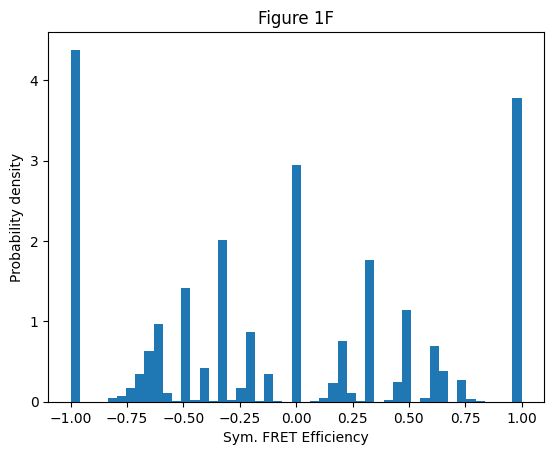

In [17]:
nb_bins = 50 # number of bins to calculate (between -1 and 1)

count_data_point = 0
for i in range(len(IDonorEn)):
    count_data_point = count_data_point + len(IDonorEn[i])
FRET_int = np.zeros(count_data_point)

count_i = 0
for i in range(len(IDonorEn)):
    I_donor = np.array(IDonorEn[i])
    I_acceptor = np.array(IAcceptorEn[i])
    FRET_int[count_i:count_i+len(IDonorEn[i])] = (I_acceptor - I_donor)/(I_acceptor + I_donor)
    count_i = count_i + len(IDonorEn[i])

FRET_int = FRET_int[~np.isnan(FRET_int)]

bins = np.linspace(-1, 1, nb_bins)

plt.hist(FRET_int, bins=bins, density = True)
plt.title('Figure 1F')
plt.xlabel('Sym. FRET Efficiency')
plt.ylabel('Probability density')

## 4. Calculate primed correlation functions

Set the higher moment order you want to calculate

In [8]:
MaxOrder = 15 # Higher order moment for the primed correlations functions

EnCorrelationPP = [] # list containing all C++ correlation functions
EnCorrelationPM = [] # list containing all C+- correlation functions
EnCorrelationMP = [] # list containing all C-+ correlation functions
EnCorrelationMM = [] # list containing all C-- correlation functions

for m in range(1,MaxOrder+1):
    for n in range(1,MaxOrder+1):
        print('m = ' + str(m) + ', n = ' + str(n))
        EnCorrelationPP_i = EnAvePrimedCorrelation(IPlusEn, m, IPlusEn, n)
        EnCorrelationPM_i = EnAvePrimedCorrelation(IPlusEn, m, IMinusEn, n)
        EnCorrelationMP_i = EnAvePrimedCorrelation(IMinusEn, m, IPlusEn, n)
        EnCorrelationMM_i = EnAvePrimedCorrelation(IMinusEn, m, IMinusEn, n)

        if n == 1:
            EnCorrelationPP.append([EnCorrelationPP_i])
            EnCorrelationPM.append([EnCorrelationPM_i])
            EnCorrelationMP.append([EnCorrelationMP_i])
            EnCorrelationMM.append([EnCorrelationMM_i])
        else:
            EnCorrelationPP[m-1].append(EnCorrelationPP_i)
            EnCorrelationPM[m-1].append(EnCorrelationPM_i)
            EnCorrelationMP[m-1].append(EnCorrelationMP_i)
            EnCorrelationMM[m-1].append(EnCorrelationMM_i)

m = 1, n = 1
m = 1, n = 2
m = 1, n = 3
m = 1, n = 4
m = 1, n = 5
m = 1, n = 6
m = 1, n = 7
m = 1, n = 8
m = 1, n = 9
m = 1, n = 10
m = 1, n = 11
m = 1, n = 12
m = 1, n = 13
m = 1, n = 14
m = 1, n = 15
m = 2, n = 1
m = 2, n = 2
m = 2, n = 3
m = 2, n = 4
m = 2, n = 5
m = 2, n = 6
m = 2, n = 7
m = 2, n = 8
m = 2, n = 9
m = 2, n = 10
m = 2, n = 11
m = 2, n = 12
m = 2, n = 13
m = 2, n = 14
m = 2, n = 15
m = 3, n = 1
m = 3, n = 2
m = 3, n = 3
m = 3, n = 4
m = 3, n = 5
m = 3, n = 6
m = 3, n = 7
m = 3, n = 8
m = 3, n = 9
m = 3, n = 10
m = 3, n = 11
m = 3, n = 12
m = 3, n = 13
m = 3, n = 14
m = 3, n = 15
m = 4, n = 1
m = 4, n = 2
m = 4, n = 3
m = 4, n = 4
m = 4, n = 5
m = 4, n = 6
m = 4, n = 7
m = 4, n = 8
m = 4, n = 9
m = 4, n = 10
m = 4, n = 11
m = 4, n = 12
m = 4, n = 13
m = 4, n = 14
m = 4, n = 15
m = 5, n = 1
m = 5, n = 2
m = 5, n = 3
m = 5, n = 4
m = 5, n = 5
m = 5, n = 6
m = 5, n = 7
m = 5, n = 8
m = 5, n = 9
m = 5, n = 10
m = 5, n = 11
m = 5, n = 12
m = 5, n = 13
m = 5, n = 14
m = 5, n 

Plot the (m,n) primed correlation function (normalized by the first point $\tau_1$ = 0)

Text(0, 0.5, 'Primed correlation (norm.)')

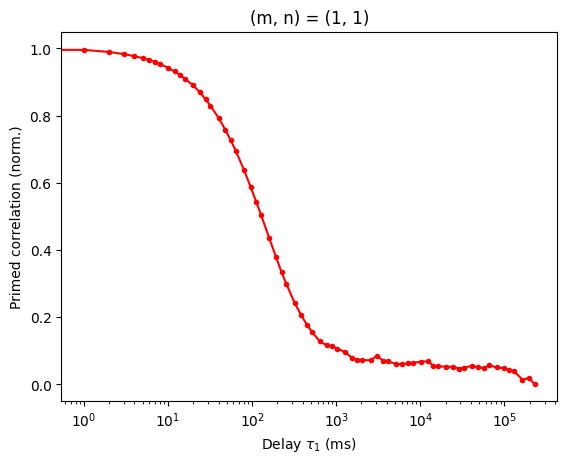

In [64]:
m = 1 # integer between 1 and MaxOrder
n = 1 # integer between 1 and MaxOrder

fig, ax = plt.subplots()
ax.plot(EnCorrelationMM[m-1][n-1][1], EnCorrelationMM[m-1][n-1][0]/EnCorrelationMM[m-1][n-1][0][0], 'r.-')
ax.set_xscale('log')
plt.title('(m, n) = (' + str(m) + ', ' + str(n) + ')')
plt.xlabel('Delay ' + r'$\tau_1$' + ' (ms)')
plt.ylabel('Primed correlation (norm.)')

## 5. Calculate efficiency correlations

See equations (47) and (49) from original study

In [9]:
EnCorrelationFRETEff = []

for m in range(1,MaxOrder+1):
    for n in range(1,MaxOrder+1):
        # print('m = ' + str(m) + ', n = ' + str(n) + ', coeff = ' + str(np.array(EnCorrelationMM[m-1][n-1][0])/np.array(EnCorrelationPP[m-1][n-1][0])))
        # EnCorrelationFRETEff[m-1][n-1][0][0] = np.array(EnCorrelationMM[m-1][n-1][0])/np.array(EnCorrelationPP[m-1][n-1][0])
        # EnCorrelationFRETEff[m-1][n-1][0][1] = EnCorrelationMM[m-1][n-1][1]
        # EnCorrelationFRETEff[m-1][n-1][0][2] = EnCorrelationMM[m-1][n-1][2]
        # EnCorrelationFRETEff[m-1][n-1][0][3] = EnCorrelationMM[m-1][n-1][3]

        if n == 1:
            EnCorrelationFRETEff.append([[EnCorrelationMM[m-1][n-1][0]/EnCorrelationPP[m-1][n-1][0], EnCorrelationMM[m-1][n-1][1], EnCorrelationMM[m-1][n-1][2], EnCorrelationMM[m-1][n-1][3]]])
        else:
            EnCorrelationFRETEff[m-1].append([EnCorrelationMM[m-1][n-1][0]/EnCorrelationPP[m-1][n-1][0], EnCorrelationMM[m-1][n-1][1], EnCorrelationMM[m-1][n-1][2], EnCorrelationMM[m-1][n-1][3]])

/tmp/ipython-input-711381862.py:12: RuntimeWarning: invalid value encountered in divide
  EnCorrelationFRETEff.append([[EnCorrelationMM[m-1][n-1][0]/EnCorrelationPP[m-1][n-1][0], EnCorrelationMM[m-1][n-1][1], EnCorrelationMM[m-1][n-1][2], EnCorrelationMM[m-1][n-1][3]]])
/tmp/ipython-input-711381862.py:14: RuntimeWarning: invalid value encountered in divide
  EnCorrelationFRETEff[m-1].append([EnCorrelationMM[m-1][n-1][0]/EnCorrelationPP[m-1][n-1][0], EnCorrelationMM[m-1][n-1][1], EnCorrelationMM[m-1][n-1][2], EnCorrelationMM[m-1][n-1][3]])


## 6. Extract the 0D univariate moments from the 1D correlation functions

All $\tau_1=0$ values from (m+n) 1D correlations functions are extracted and weight-averaged.

Set the number of moments to be used in the inversion as InversionOrder.

In [30]:
InversionOrder = 10 # number of moments to be used in the inversion

MomentsFRETEff = np.zeros(InversionOrder)
MomentsFRETEff_count = np.zeros(InversionOrder) # 1D array used for the weighted average of MomentsFRETEff

WeightsFRETEff = np.zeros(InversionOrder)

for m in range(1,InversionOrder):
    for n in range(1,InversionOrder):
        if (m+n) <= InversionOrder:
            MomentsFRETEff[m+n-1] = MomentsFRETEff[m+n-1] + EnCorrelationFRETEff[m-1][n-1][0][0] * EnCorrelationFRETEff[m-1][n-1][3][0] # EnCorrelationFRETEff[m-1][n-1][0][0][0]
            MomentsFRETEff_count[m+n-1] = MomentsFRETEff_count[m+n-1] + EnCorrelationFRETEff[m-1][n-1][3][0]
            WeightsFRETEff[m+n-1] = EnCorrelationFRETEff[m-1][n-1][3][0]

MomentsFRETEff[1:] = MomentsFRETEff[1:] / MomentsFRETEff_count[1:]

Plot the noise-corrected, 0D moments of the symmetric FRET efficiency vs. moment order (m+n)

Text(0, 0.5, '$\\pm$ Moment $C_{m+n}[E_s]$')

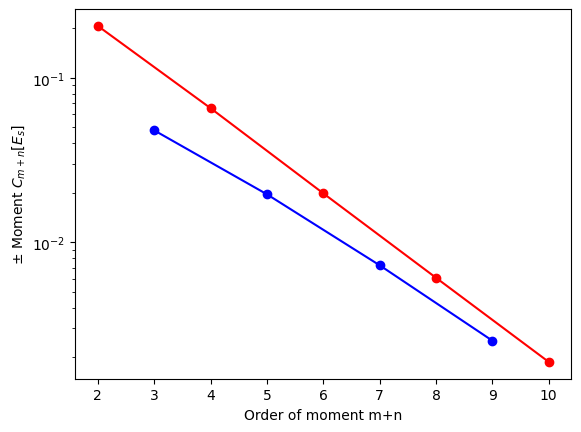

In [40]:
fig, ax = plt.subplots()

ax.plot(range(2,InversionOrder+1,2),np.abs(MomentsFRETEff[1::2]), 'ro-')
ax.plot(range(3,InversionOrder+1,2),np.abs(MomentsFRETEff[2::2]), 'bo-')
ax.set_yscale('log')
plt.xlabel('Order of moment m+n')
plt.ylabel(r'$\pm$'+' Moment ' + r'$C_{m+n}[E_s]$')

## 7. Prepare the derivative and Vandermonde matrices

In [41]:
FRETEff = np.linspace(-1, 1, 100)

D = CreateDerivative(FRETEff)

V = CreateVandermonde(FRETEff, InversionOrder)

## 8. Recover the states space and plot the calculated states space

Set the smoothing parameter Beta

(Beta = 0 --> no smoothing of the distribution)

(CVXPY) Dec 23 04:28:59 PM: Your problem has 100 variables, 201 constraints, and 0 parameters.
(CVXPY) Dec 23 04:28:59 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Dec 23 04:28:59 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Dec 23 04:28:59 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Dec 23 04:28:59 PM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Dec 23 04:28:59 PM: Compiling problem (target solver=CLARABEL).
(CVXPY) Dec 23 04:28:59 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> CLARABEL
(CVXPY) Dec 23 04:28:59 PM: Applying reduction Dcp2Cone
(CVXPY) Dec 23 04:28:59 PM: Applying reduction CvxAttr2Constr
(CVXPY) Dec 23 04:28:59 PM: Applying reduction ConeMatrixStuffing
(CVXPY) Dec 23 04:28:59 PM: Applying reduction CLARABEL
(CVXPY) Dec 23 04:28:59 PM: Finished problem compil

                                     CVXPY                                     
                                     v1.6.7                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
-------------------------------------------------------------
           Clarabel.rs v0.11.1  -  Clever Acronym                

                   (c) Paul Goulart                          
                University of Oxford, 2022                   
-------------------------------------------------------------

problem:
  variables     = 209
  constraints

(CVXPY) Dec 23 04:28:59 PM: Problem status: optimal
(CVXPY) Dec 23 04:28:59 PM: Optimal value: 1.004e+00
(CVXPY) Dec 23 04:28:59 PM: Compilation took 2.387e-02 seconds
(CVXPY) Dec 23 04:28:59 PM: Solver (including time spent in interface) took 8.645e-03 seconds


  0  +9.0938e+00  -4.0106e+03  4.42e+02  6.64e-01  2.77e-16  1.00e+00  6.24e+01   ------   
  1  +1.4648e+00  -3.8268e+02  2.62e+02  1.55e-01  3.41e-16  2.80e+00  9.85e+00  9.21e-01  
  2  +1.1469e+00  -2.7677e+01  2.51e+01  1.28e-02  1.60e-16  2.07e-01  8.92e-01  9.15e-01  
  3  +1.2302e+00  -2.2961e+00  2.87e+00  1.41e-03  2.21e-16  2.05e-02  1.28e-01  8.97e-01  
  4  +1.1220e+00  -1.8597e-02  1.14e+00  3.87e-04  2.31e-16  6.53e-03  4.06e-02  9.72e-01  
  5  +1.0611e+00  +3.6906e-01  6.92e-01  2.25e-04  2.61e-16  3.92e-03  2.38e-02  6.94e-01  
  6  +1.0227e+00  +9.4487e-01  7.79e-02  1.50e-05  2.25e-16  3.36e-04  2.60e-03  9.44e-01  
  7  +1.0107e+00  +9.9282e-01  1.79e-02  2.30e-06  7.65e-16  8.04e-05  5.22e-04  9.23e-01  
  8  +1.0061e+00  +9.9822e-01  7.84e-03  7.90e-07  9.41e-16  3.92e-05  1.88e-04  9.90e-01  
  9  +1.0043e+00  +1.0038e+00  5.33e-04  1.12e-08  7.01e-16  2.15e-06  1.18e-05  9.89e-01  
 10  +1.0041e+00  +1.0041e+00  3.01e-05  2.46e-10  2.53e-16  1.18e-07  6.27e-07 

Text(0, 0.5, 'Probability density')

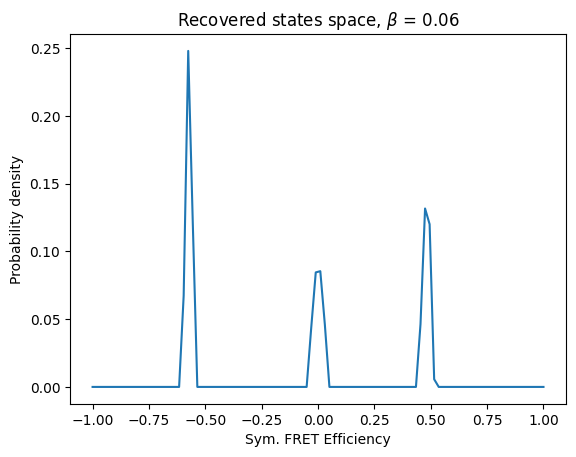

In [65]:
Beta = 0.06

InitialGuess = np.ones(len(FRETEff))*(1/len(FRETEff))

Population, Chi, S = InvertMoments(MomentsFRETEff, WeightsFRETEff, FRETEff, V, D, Beta, InitialGuess)

fig, ax = plt.subplots()
ax.plot(FRETEff, Population)
plt.title('Recovered states space, ' + r'$\beta$ = ' + str(Beta))
plt.xlabel('Sym. FRET Efficiency')
plt.ylabel('Probability density')